In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#convert 2 dimension to 1 dimension
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [37]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [38]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,1))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


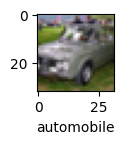

In [39]:
plot_sample(X_train, y_train, 44)

In [16]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3045 - loss: 1.9348
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4160 - loss: 1.6497
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4512 - loss: 1.5553
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4746 - loss: 1.4876
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4924 - loss: 1.4347


In [18]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4934 - loss: 1.4418


[1.450653314590454, 0.4846999943256378]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.46      0.65      0.54      1000
           1       0.55      0.69      0.61      1000
           2       0.35      0.42      0.38      1000
           3       0.42      0.22      0.29      1000
           4       0.59      0.16      0.26      1000
           5       0.35      0.44      0.39      1000
           6       0.50      0.58      0.54      1000
           7       0.56      0.52      0.54      1000
           8       0.60      0.63      0.62      1000
           9       0.57      0.52      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



**Using CNN**

In [25]:
cnn = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3772 - loss: 1.7150
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5976 - loss: 1.1470
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6503 - loss: 0.9978
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6862 - loss: 0.9024
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7039 - loss: 0.8402
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7329 - loss: 0.7724
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7506 - loss: 0.7200
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7596 - loss: 0.6777
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7811 - loss: 0.6258
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7909 - loss: 0.5964


In [26]:
cnn.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7037 - loss: 0.9006


[0.9085748791694641, 0.7039999961853027]

In [46]:
y_pred = cnn.predict(X_test_scaled)
y_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(0), np.int64(0), np.int64(4)]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [49]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

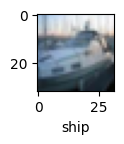

In [50]:
plot_sample(X_test, y_test, 2)

In [51]:
classes[y_pred_classes[2]]

'airplane'

In [52]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.88      0.76      0.81      1000
           2       0.64      0.53      0.58      1000
           3       0.49      0.57      0.53      1000
           4       0.66      0.66      0.66      1000
           5       0.60      0.64      0.62      1000
           6       0.83      0.73      0.77      1000
           7       0.70      0.80      0.75      1000
           8       0.86      0.77      0.81      1000
           9       0.72      0.84      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.71     10000
weighted avg       0.71      0.70      0.71     10000

